In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [24]:
log_frac_errors = np.abs(np.loadtxt('zd_frac_dev.npy') )
#log_frac_errors = np.abs(np.loadtxt('zd_rmfsd.npy'))

In [32]:
print log_frac_errors.shape

(7, 9)


In [25]:
rms = np.sqrt(np.mean((log_frac_errors)**2, axis = 0))

In [26]:
top_percentile, bottom_percentile = np.percentile(log_frac_errors, [84, 16], axis = 0)

In [27]:
print top_percentile
print bottom_percentile

[ 0.78050797  0.7289481   0.56113426  0.26678176  0.15507846  0.14799833
  0.1640051   0.1957831   0.29022561]
[ 0.75365213  0.65903541  0.46106901  0.20336726  0.12105624  0.10607609
  0.07271153  0.07802981  0.13640439]


In [28]:
from os import path
data_dir = '/u/ki/swmclau2/des/emulator_tarfile/wp_data/'
e1 = np.loadtxt(path.join(data_dir, 'Cosmo_err.dat'))
e2 = np.loadtxt(path.join(data_dir, 'Cosmo_pure_err.dat'))

yerr_1bin = np.sqrt(e2 ** 2.0 + (e1 ** 2.0 - e2 ** 2.0) / 9.0)

In [29]:
bin_centers = np.loadtxt('rbins.npy')

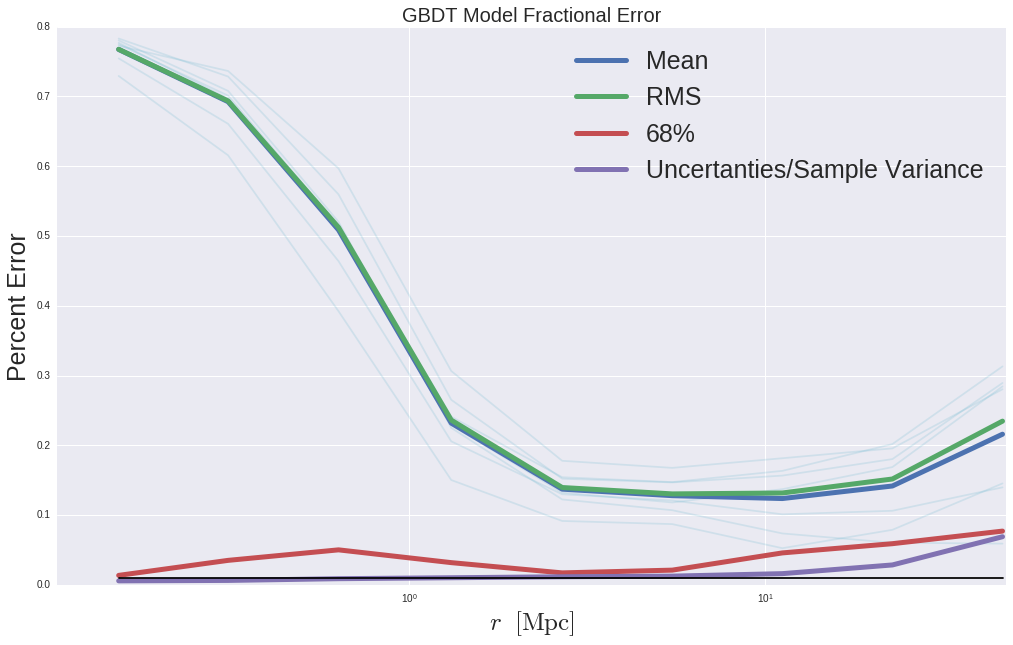

In [31]:
fig = plt.figure(figsize= (17,10))

c = colors.next()
for sample in log_frac_errors:
    plt.plot(bin_centers, sample, color = c,alpha = 0.2 )
    
plt.plot(bin_centers, log_frac_errors.mean(axis =0), color = colors.next(), lw = 5, label = 'Mean')
plt.plot(bin_centers, rms, color = colors.next(), lw = 5, label = 'RMS')
plt.plot(bin_centers, (top_percentile-bottom_percentile)/2, color = colors.next(), lw = 5, label = '68%')
plt.plot(bin_centers, yerr_1bin, color = colors.next(), lw = 5, label = 'Uncertanties/Sample Variance')

plt.title('GBDT Model Fractional Error', fontsize =20)
plt.plot(bin_centers, np.ones(len(bin_centers))*0.01, color = 'k')
plt.xlim(xmin = bin_centers.min()-0.05, xmax = bin_centers.max()+1)
#plt.ylim(ymin = 0, ymax = 0.25)
#plt.loglog()
plt.xscale('log')
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
#plt.ylabel(r'$|\hat{w_p}(r_p) - w_p(r_p)|/w_p(r_p) $', fontsize=25)
plt.legend(loc = 'best', fontsize = 25)

plt.ylabel(r'Percent Error', fontsize = 25)
#plt.suptitle('Errors and GOF of various Emulators, Log Space', fontsize = 20)
plt.show()